# $$\href{https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset}{\text{Loan Approval Prediction Dataset}}$$

## About Dataset
The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features.

---
## Objective:
You are required to construct a Deep Learning network that helps your bank to classify each loan request based on given data.

---
- Eploratory Data Analysis (EDA): explore and analyze the dataset to gain insights and better understand the data's characteristics. You might face problems like:
    - Missing Values
    - Outliers
    - Data Skewness
- Data Preprocessing: involve the cleaning, transforming, and organizing of the data to make it suitable for training a model.
- Model & Metrics Selection
- Hyperparameter Tuning


we have a bunch of question we need to know their answers so that we can fully understand the data
1. Does the bank usually Approve or Reject loan applications?
2. Does the cibil score really affect loan status?
3. Is the education level an indicator for loan applicants?
4. What're the columns that have a strong relationship to each other?

In [6]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics

In [7]:
from google.colab import files
uploaded = files.upload()

Saving loan_approval_dataset.csv to loan_approval_dataset.csv


In [8]:
df = pd.read_csv(io.StringIO(uploaded['loan_approval_dataset.csv'].decode('utf-8')))
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [9]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [11]:
df.shape

(4269, 13)

In [12]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [ ]:
df.nunique()

In [ ]:
df.dtypes

###**There're no null values whick is a good point because we don't have to waste our time dealing with them we will change columns' names to delete the space before every name**

In [13]:
df.rename(columns = {' no_of_dependents' : 'no_of_dependents',' education': 'education', ' self_employed': 'self_employed',
' loan_amount': 'loan_amount', ' income_annum' : 'income_annum', ' loan_term': 'loan_term',
 ' cibil_score': 'cibil_score',' residential_assets_value' : 'residential_assets_value', ' commercial_assets_value' :
'commercial_assets_value', ' luxury_assets_value' :'luxury_assets_value', ' bank_asset_value': 'bank_asset_value',
 ' loan_status': 'loan_status' }, inplace= True)

#Exploratry Data Analysis

<Axes: >

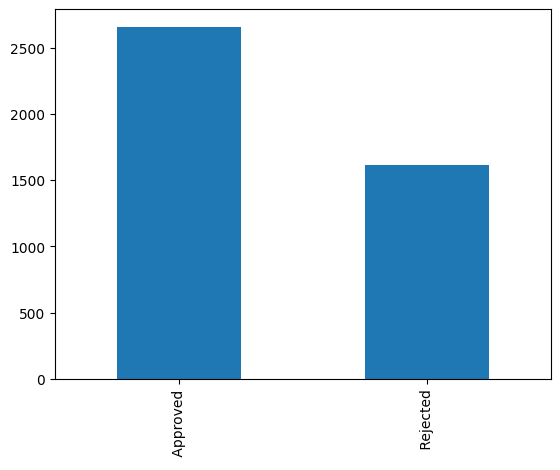

In [14]:
#Q1
df['loan_status'].value_counts().plot.bar()

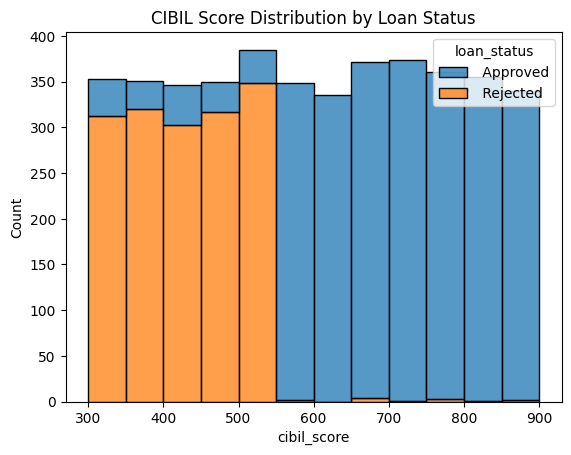

In [15]:
#Q2 Histogram of CIBIL scores divided by loan status
sns.histplot(data=df, x='cibil_score', hue='loan_status', multiple='stack', binwidth=50)
plt.title('CIBIL Score Distribution by Loan Status')
plt.show()

###number of approved loans is almost double th enumber of rejected loans cibil score has a strong relationship with loan status. when score increases, you have a bigger chance to get the approval

In [16]:
#Q3
df['education'].value_counts()

 Graduate        2144
 Not Graduate    2125
Name: education, dtype: int64

###number of Gradues and non graduated is almost equal, so there's no coorelation we can conclude

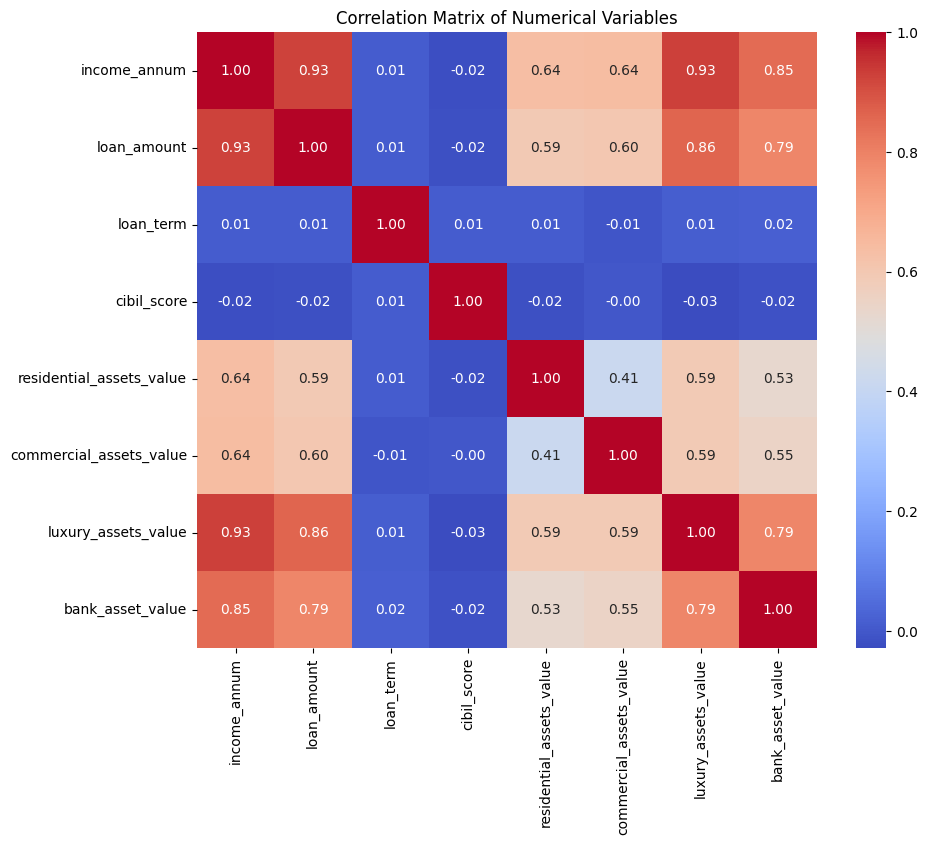

In [17]:
#Q4
num_cols = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score',
            'residential_assets_value', 'commercial_assets_value',
            'luxury_assets_value', 'bank_asset_value']

correlation_matrix = df[num_cols].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

###As we can see, the only strong relationship we can conclude is that income annum has a strong relationship with loan amount, lucury assets value, and bank asset value

#Modeling

it's a binary classification problem, so we will use Logistic regression, SVC, Decision tree, and Random forest

In [18]:
#converting coluns to numeric values
df1 = pd.get_dummies(df, columns = ['education', 'self_employed', 'loan_status'])
df1.head()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes,loan_status_ Approved,loan_status_ Rejected
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,0,1,0,1,0
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,1,0,1,0,1
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,0,1,0,0,1
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,0,1,0,0,1
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,1,0,1,0,1


In [19]:
df1=df1.drop(columns=['loan_id'])
df1.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes,loan_status_ Approved,loan_status_ Rejected
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,0,1,0,1,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,1,0,1,0,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,0,1,0,0,1
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,0,1,0,0,1
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,1,0,1,0,1


In [20]:
#preparing X and Y sets
X = df1.drop(columns=['loan_status_ Approved','loan_status_ Rejected'],axis=1)
Y =df1.filter(['loan_status_ Approved'])

In [21]:
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [22]:
#splitting data sets into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

##Logistic Regression model

In [23]:
logistic_classifier = LogisticRegression()
# Train Logistic regression model
logistic_classifier.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [24]:
# Make Prediction & print the result
y_pred1 = logistic_classifier.predict(X_test)
print(classification_report(Y_test,y_pred1))
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       318
           1       0.92      0.93      0.92       536

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.91      0.90       854

Accuracy: 0.905152224824356


##Support Vectore Machine

In [25]:
svc_classifier = SVC(kernel='linear')
# Train SVC
svc_classifier.fit(X_train, Y_train)

# Make Prediction & print the result
y_pred2 = svc_classifier.predict(X_test)
print(classification_report(Y_test,y_pred2))
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred2))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.88      0.91      0.89       318
           1       0.94      0.92      0.93       536

    accuracy                           0.92       854
   macro avg       0.91      0.91      0.91       854
weighted avg       0.92      0.92      0.92       854

Accuracy: 0.9168618266978923


##Decision tree model

In [26]:
clf = DecisionTreeClassifier()
# Train Decision Tree Classifier
clf = clf.fit(X_train,Y_train)
# Make Prediction & print the result
y_pred3 = clf.predict(X_test)
print(classification_report(Y_test,y_pred3))
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Accuracy: 0.977751756440281


##Random forest calssifier

In [27]:
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
# Train Random forest classifer
rf_model.fit(X_train, Y_train)
# Make Prediction & print the result
y_pred4 = clf.predict(X_test)
print(classification_report(Y_test,y_pred4))

<ipython-input-27-0ee7ce810ee5>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, Y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



##Best models are Random forest and decision tree